In [1]:
import rootsstyle
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [47]:
df_cars = sns.load_dataset("mpg")
df_cars["model_year"] = "' " + df_cars["model_year"].astype(str)
df_cars_origin_year = df_cars.groupby(["origin", "model_year"]).mean().reset_index()

df_flights = sns.load_dataset("flights")
df_flights_month_year_passenger = df_flights.pivot("month", "year", "passengers")

# EXAMPLE PLOTS

In [3]:
OUTPUT_DIR = Path('temp')
OUTPUT_DIR.mkdir(exist_ok=True)


In [60]:
from PIL import Image

default_light_theme = '#FFFFFF'
default_dark_theme = '#0D1117'
def plot_next_to_each_other(images=None):
    def plot_with_background_color(color):
        _ , axes = plt.subplots(nrows=1, ncols=len(images), figsize=(15,8), facecolor=color)
        for i in range(len(images)):
            ax = axes[i]
            image = Image.open(Path.joinpath(OUTPUT_DIR, images[i]))
            ax.imshow(image)
            ax.axis("off")
            plt.tight_layout()
        plt.show()
        plt.close()
    plot_with_background_color(default_light_theme)
    plot_with_background_color(default_dark_theme)

## BAR PLOT

### DEFAULT SEABORN

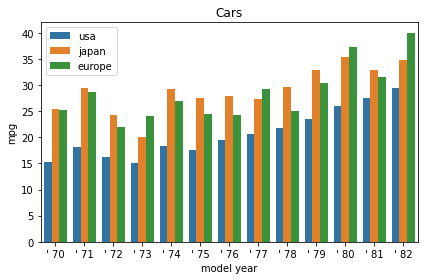

In [27]:
sns.barplot(x="model_year", y="mpg", data=df_cars, hue="origin", ci=None)
plt.ylabel("mpg")
plt.xlabel("model year")
plt.legend()
plt.title("Cars")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/barplot.png", transparent=True)
plt.show()
plt.close()

### ROOTSSTYLE

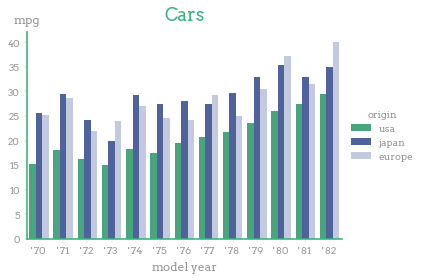

In [28]:
with plt.style.context(rootsstyle.style):
    sns.barplot(x="model_year", y="mpg", data=df_cars, hue="origin", ci=None)
    rootsstyle.ylabel("mpg")
    plt.xlabel("model year")
    rootsstyle.legend()
    plt.title("Cars")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/barplot_rootsstyle.png")
    plt.show()
    plt.close()

### COMPARISSON

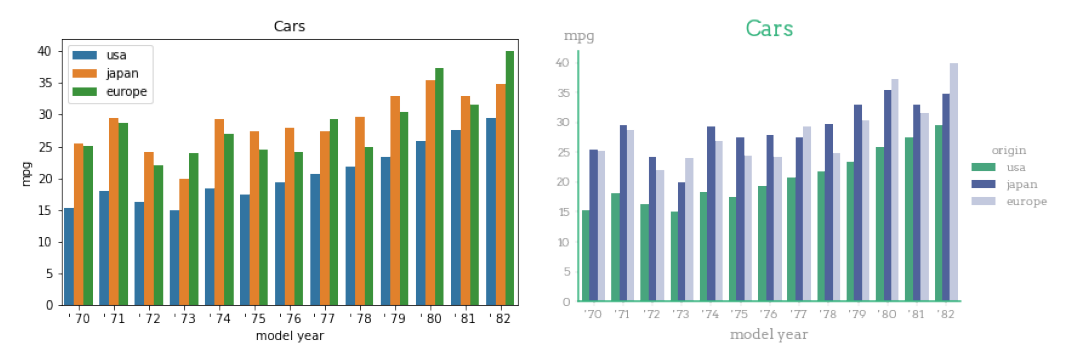

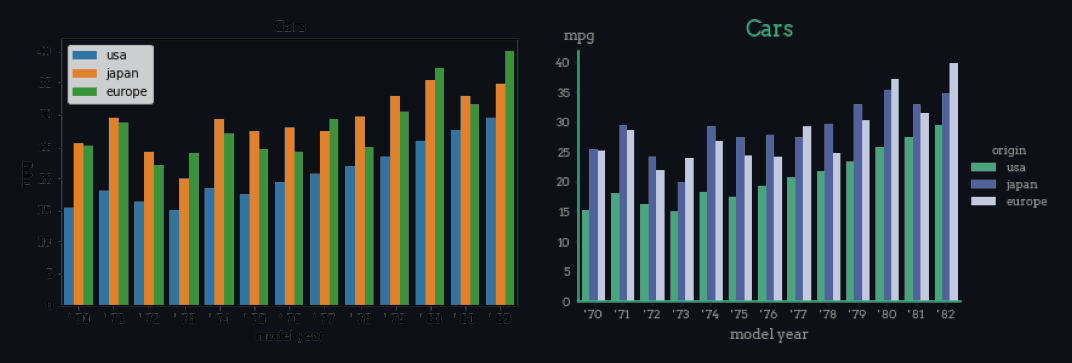

In [61]:
plot_next_to_each_other(images=['barplot.png', 'barplot_rootsstyle.png'])

## LINE PLOT

### SEABORN DEFAULT

In [34]:
sns.lineplot(
    x="model_year",
    y="mpg",
    data=df_cars,
    hue="origin",
    ci=None
)
plt.legend()
plt.ylabel("mpg")
plt.xlabel("model year")
plt.title("Cars")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/lineplot_cars.png")
plt.close()

### ROOTSSTYLE

In [35]:
with plt.style.context(rootsstyle.style):
    sns.lineplot(
        x="model_year",
        y="mpg",
        data=df_cars,
        hue="origin",
        palette=sns.color_palette("dataroots-default", as_cmap=True).colors[:3],
        ci=None
    )
    rootsstyle.legend()
    rootsstyle.ylabel("mpg")
    plt.xlabel("model year")
    plt.title("Cars")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/lineplot_cars_rootsstyle.png")
    plt.close()

### COMPARISSON

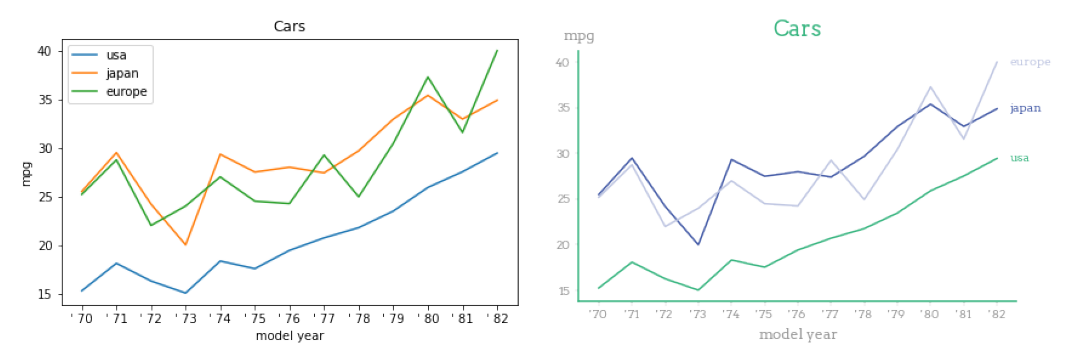

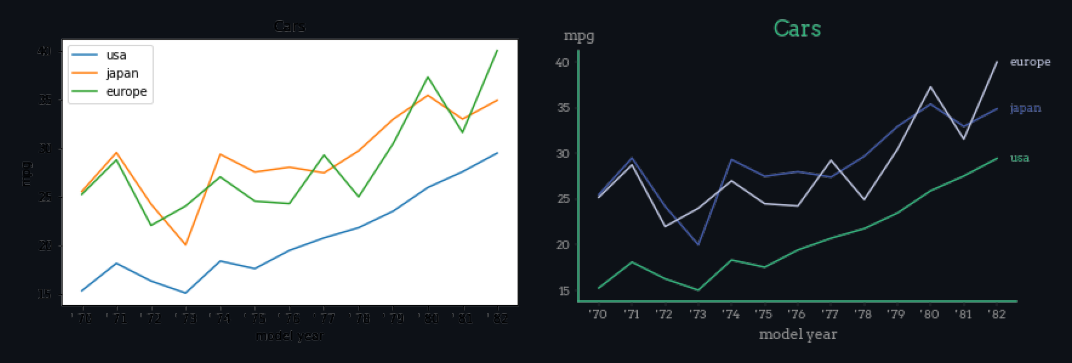

In [36]:
plot_next_to_each_other(images=['lineplot_cars.png', 'lineplot_cars_rootsstyle.png'])

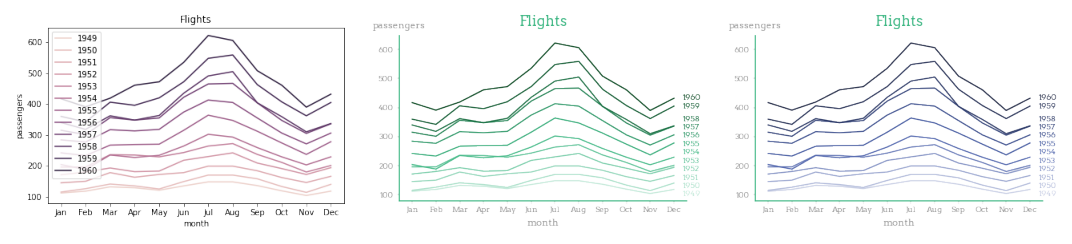

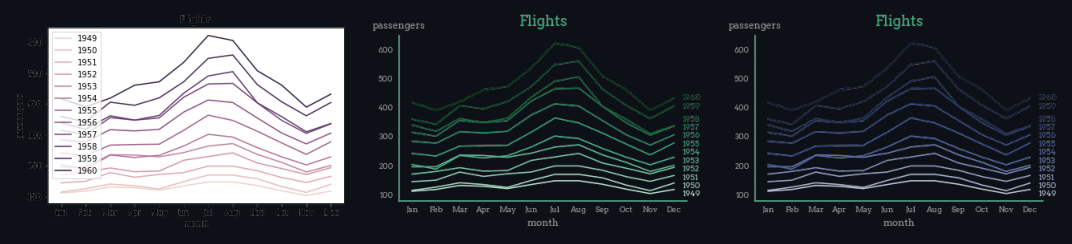

In [46]:
# DEFAULT SEABORN
sns.lineplot(
    x="month",
    y="passengers",
    data=df_flights,
    hue="year",
    legend="full",
)
plt.legend()
plt.ylabel("passengers")
plt.xlabel("month")
plt.title("Flights")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/lineplot_hue.png")
plt.close()

# ROOTSSTYLE GREEN
with plt.style.context(rootsstyle.style):
    sns.lineplot(
        x="month",
        y="passengers",
        data=df_flights,
        hue="year",
        palette="dataroots-green",
        legend="full",
    )
    rootsstyle.legend()
    rootsstyle.ylabel("passengers")
    plt.xlabel("month")
    plt.title("Flights")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/lineplot_green.png")
    plt.close()

# ROOTSSTYLE BLUE
with plt.style.context(rootsstyle.style):
    sns.lineplot(
        x="month",
        y="passengers",
        data=df_flights,
        hue="year",
        palette="dataroots-blue",
        legend="full",
    )
    rootsstyle.legend()
    rootsstyle.ylabel("passengers")
    plt.xlabel("month")
    plt.title("Flights")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/lineplot_blue.png")
    plt.close()

plot_next_to_each_other(images=['lineplot_hue.png','lineplot_green.png','lineplot_blue.png'])

## HEATMAPS

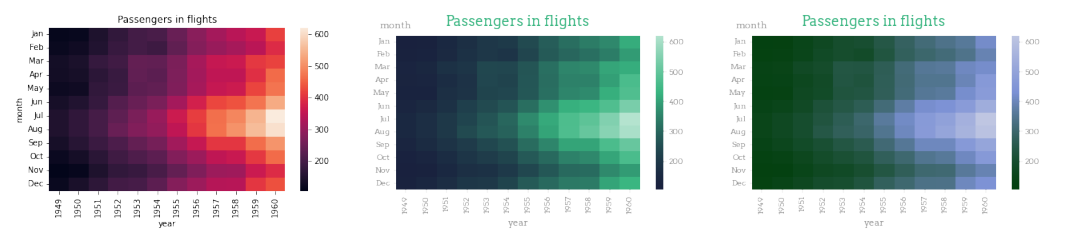

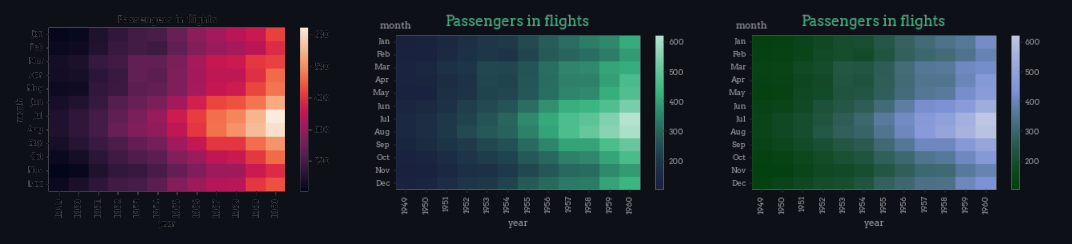

In [49]:
# SEABORN DEFAULT
sns.heatmap(data=df_flights_month_year_passenger)
plt.ylabel("month")
plt.title("Passengers in flights")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/heatmap.png")
plt.close()


with plt.style.context(rootsstyle.style):
    sns.heatmap(data=df_flights_month_year_passenger, cmap="dataroots-blue-to-green")
    rootsstyle.ylabel("month")
    plt.title("Passengers in flights")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/heatmap_blue_to_green.png")
    plt.close()

    sns.heatmap(data=df_flights_month_year_passenger, cmap="dataroots-green-to-blue")
    rootsstyle.ylabel("month")
    plt.title("Passengers in flights")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/heatmap_green_to_blue.png")
    plt.close()

plot_next_to_each_other(images=['heatmap.png','heatmap_blue_to_green.png','heatmap_green_to_blue.png'])

In [63]:
import shutil
shutil.rmtree(OUTPUT_DIR)